In [1]:
import h5py
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np
from glob import glob

In [ ]:
# get files from 2023-07-16_06.48 to 2023-07-16_07.00
# format looks like this:
#/1-fnp/petasaur/p-jbod1/cidas/incoming/TERRA_FiberA_25Hz/decimator2_2023-07-16_06.48*

filelist = []
filelist.append(glob('/1-fnp/petasaur/p-jbod1/cidas/incoming/TERRA_FiberA_25Hz/decimator2_2023-07-16_06.48*')[0])
filelist.append(glob('/1-fnp/petasaur/p-jbod1/cidas/incoming/TERRA_FiberA_25Hz/decimator2_2023-07-16_06.49*')[0])
filelist = filelist + glob('/1-fnp/petasaur/p-jbod1/cidas/incoming/TERRA_FiberA_25Hz/decimator2_2023-07-16_06.5*')

for i,file in enumerate(filelist):
    data = h5py.File(file)
    if i==0:
        attrs=dict(data['Acquisition'].attrs)
        dt = 1/attrs['MaximumFrequency']/2
        dx = attrs['SpatialSamplingInterval']
        nt,nx = das.shape    
        das = np.array(data['Acquisition/Raw[0]/RawData'])
        time = np.array(data['Acquisition/Raw[0]/RawDataTime'])
    else:
        das = np.vstack((das,np.array(data['Acquisition/Raw[0]/RawData'])))
        time = np.hstack((time,np.array(data['Acquisition/Raw[0]/RawDataTime'])))
        nt += nt
    data.close()
    

x = np.linspace(0,nx*dx,nx)
t = np.linspace(0,nt*dt,nt)

['/1-fnp/petasaur/p-jbod1/cidas/incoming/TERRA_FiberA_25Hz/decimator2_2023-07-16_06.48.04_UTC.h5', '/1-fnp/petasaur/p-jbod1/cidas/incoming/TERRA_FiberA_25Hz/decimator2_2023-07-16_06.49.04_UTC.h5', '/1-fnp/petasaur/p-jbod1/cidas/incoming/TERRA_FiberA_25Hz/decimator2_2023-07-16_06.50.04_UTC.h5', '/1-fnp/petasaur/p-jbod1/cidas/incoming/TERRA_FiberA_25Hz/decimator2_2023-07-16_06.51.04_UTC.h5', '/1-fnp/petasaur/p-jbod1/cidas/incoming/TERRA_FiberA_25Hz/decimator2_2023-07-16_06.52.04_UTC.h5', '/1-fnp/petasaur/p-jbod1/cidas/incoming/TERRA_FiberA_25Hz/decimator2_2023-07-16_06.53.04_UTC.h5', '/1-fnp/petasaur/p-jbod1/cidas/incoming/TERRA_FiberA_25Hz/decimator2_2023-07-16_06.54.04_UTC.h5', '/1-fnp/petasaur/p-jbod1/cidas/incoming/TERRA_FiberA_25Hz/decimator2_2023-07-16_06.55.04_UTC.h5', '/1-fnp/petasaur/p-jbod1/cidas/incoming/TERRA_FiberA_25Hz/decimator2_2023-07-16_06.56.04_UTC.h5', '/1-fnp/petasaur/p-jbod1/cidas/incoming/TERRA_FiberA_25Hz/decimator2_2023-07-16_06.57.04_UTC.h5', '/1-fnp/petasaur/p-

NameError: name 'file' is not defined

In [4]:
b,a = butter(2,1,'high',fs=1/dt)
data_hf = filtfilt(b,a,das,axis=0)

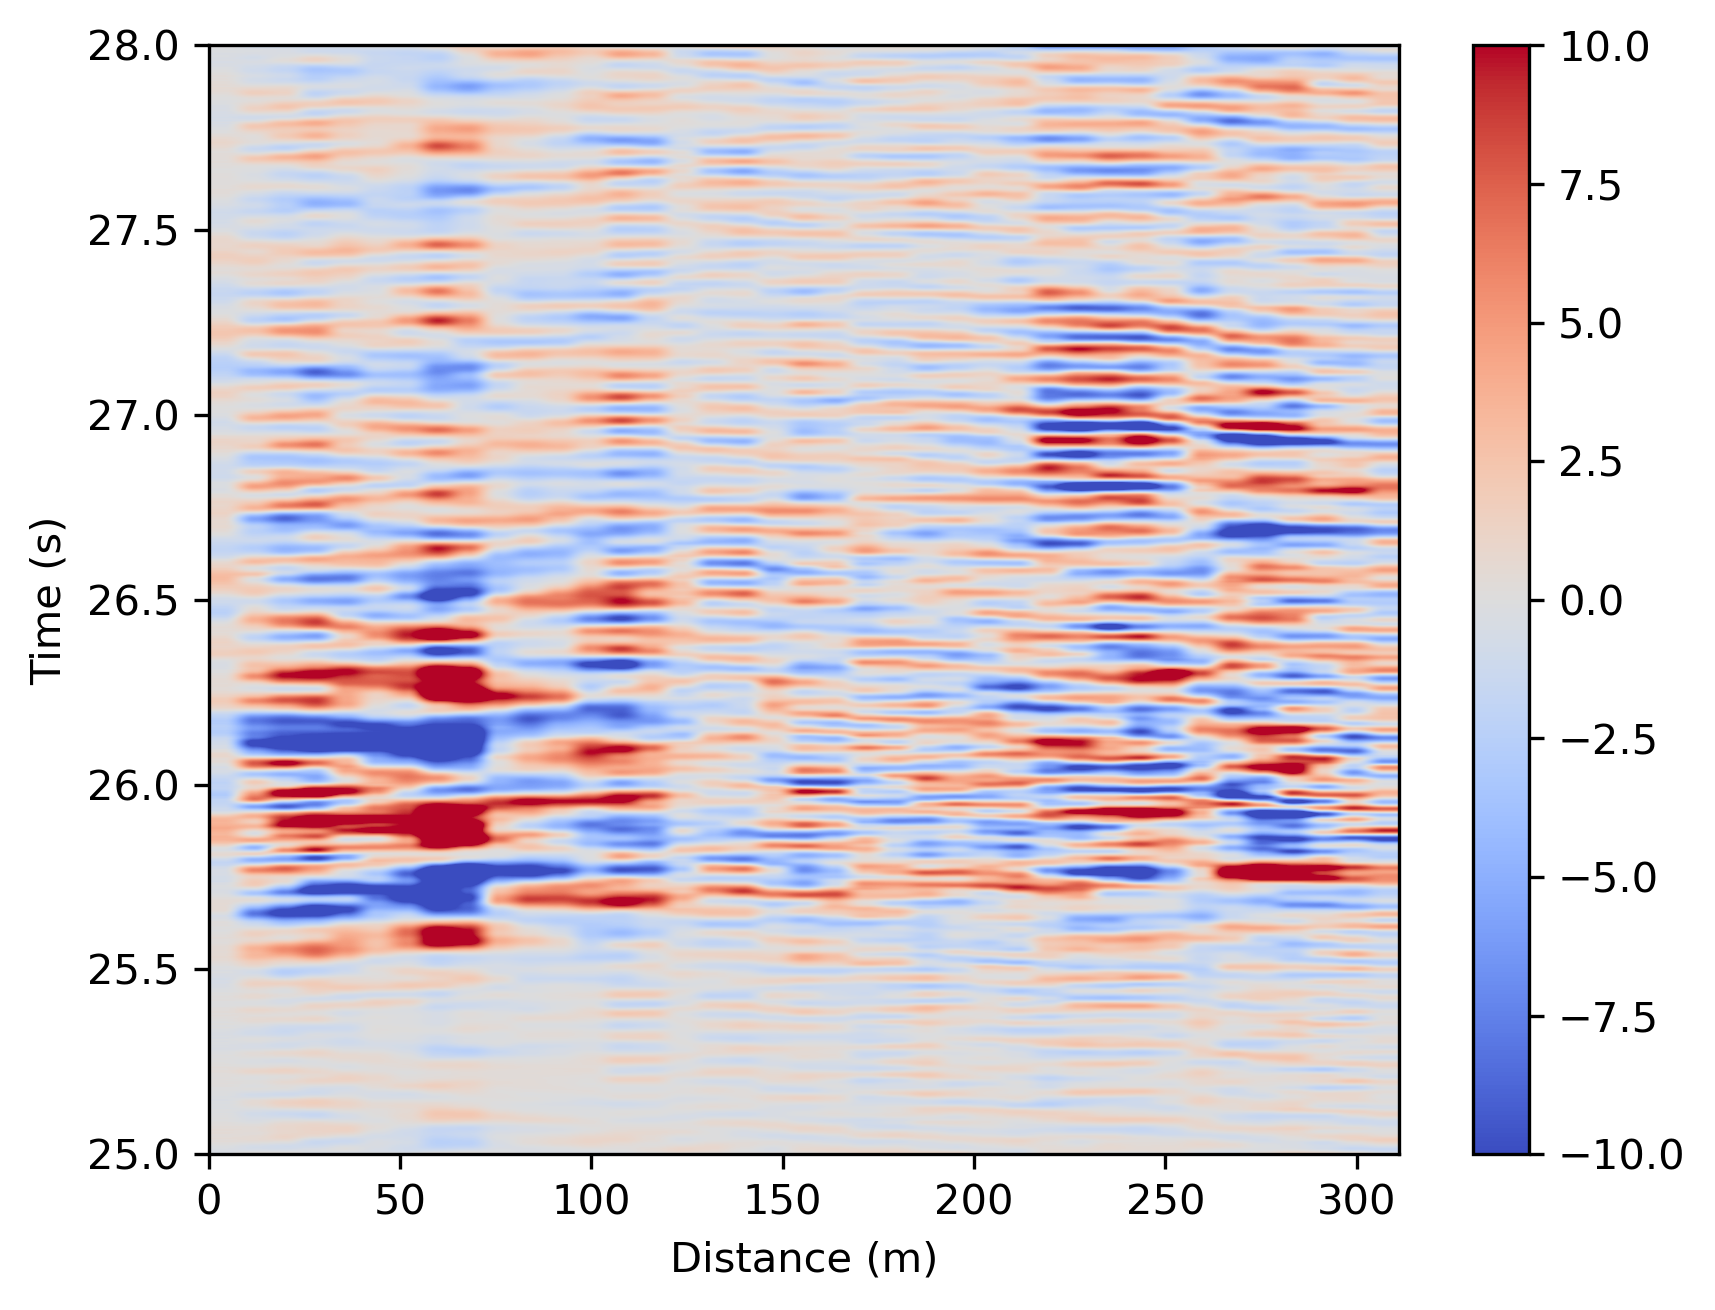

In [27]:
vm = 10
plt.subplots(dpi=300)
c=plt.imshow(data_hf,aspect='auto',cmap='coolwarm',
             vmin=-vm,vmax=vm,extent=[x[0],x[-1],t[-1],t[0]])
plt.colorbar(c)
plt.xlabel('Distance (m)')
plt.ylabel('Time (s)')
# plt.xlim([0,100])
plt.ylim([25,28])
plt.show()

In [6]:
data_hf.shape

(60000, 39)

Text(0.5, 0, 'Time (s)')

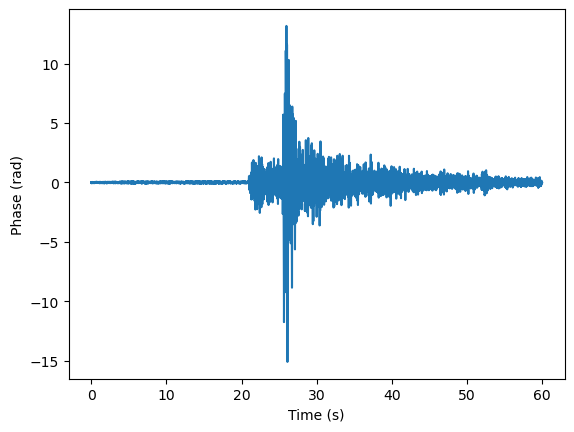

In [29]:
plt.plot(t,data_hf[:,2])
# plt.plot(t,data_hf[:,3])
# plt.plot(t,data_hf[:,4])
plt.ylabel('Phase (rad)')
plt.xlabel('Time (s)')
# plt.xlim([24,28])